In [3]:
import matplotlib.pyplot as plt
import numpy as np

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from cem import ContrastiveExplanationMethod

ModuleNotFoundError: No module named 'train'

In [6]:
dataset = MNIST()
# dataset = FashionMNIST()

# Training the classifier

In [7]:
cnn = CNN()

# train_cnn(cnn, dataset, iter=2, lr=0.001, device='cpu', save_fn='mnist-cnn', load_path="./models/saved_models/mnist-cnn.h5")

In [ ]:
images, _ = dataset.get_batch()

output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [3]:
# Train or load autoencoder
cae = CAE()

train_ae(cae, dataset, iter=2, save_fn="mnist-cae", load_path="./models/saved_models/mnist-cae.h5")

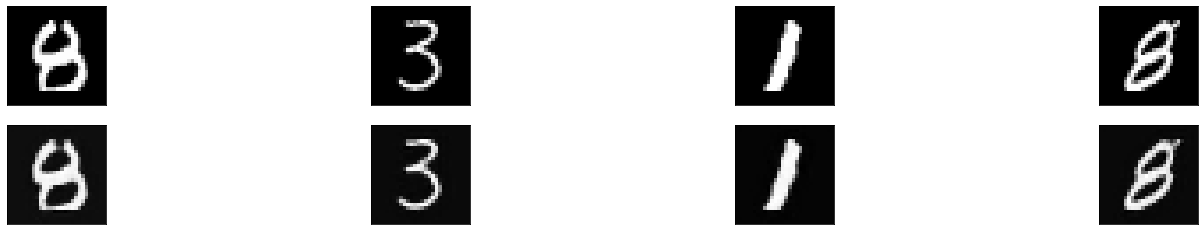

In [4]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = cae(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [21]:
CEM = ContrastiveExplanationMethod()

TypeError: __init__() missing 1 required positional argument: 'classifier'